# Phase 4 - Feature Extraction:
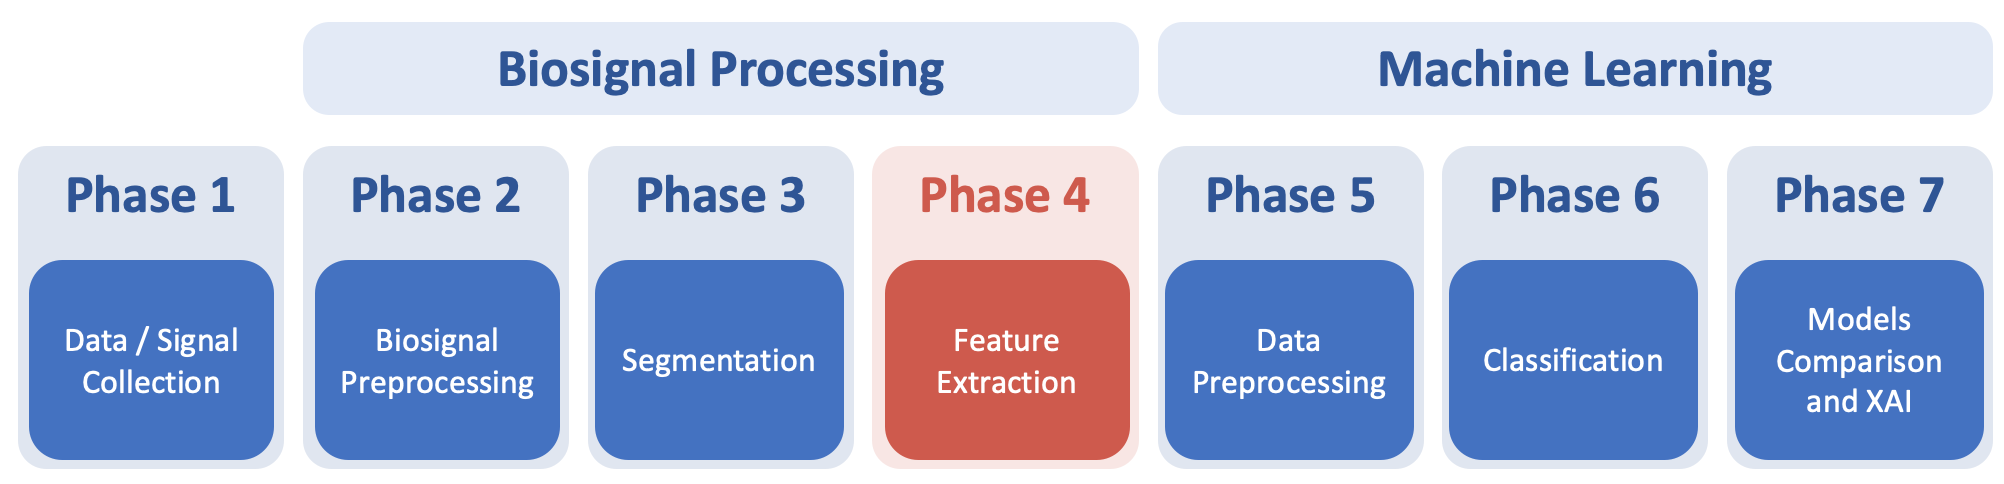

### Introduction: 
In this phase, different features are extracted from the preprocessed signals. These features are extracted from:
- Time-Domain
- Frequency Domain
- Time-Frequency Representation

All the features' types in this phase are in a form of values or images, which will direct the path of Machine Learning Model 'Phase 4'.

### Objective:
The objective of this phase is to extract all the possible features from the preprocessed signals, so that it can be used as data in the Machine Learning Model (Phase 4).

### Notes:
- The dataset used in this Notebook is imported from the saved dataset (filtered_signals_v1.csv) from local machine, which has been created in Phase 2.
- All the functions and variables, which are used in this notebook, are imported from helps.py file from the signal_processing package in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[51] is an abnormal PCG Signal.

In [2]:
# importing libraries:
import pandas as pd
from glob import glob

import constants as c
from signal_preprocessing.helpers import emd_dfilter
from feature_extraction.helpers import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the saved csv file from Phase 2:
SIGNALS = pd.read_csv('filtered_signals/filtered_signals_v1.csv')

## 1. Time-Domain Features:
### 1.1. Amplitude Envelope:
- It is the maximum amplitudes value among all samples in each frame, which indicates the level of loudness of the audio signal.
- It is however, sensitive to outliers.
- It  returns a list of values.

In [12]:
# creating a Numpy array of normal and abnormal signals with index of 0 and 51 respectively:
NORMAL_SIGNAL = np.array(SIGNALS.iloc[0, :-1])
ABNORMAL_SIGNAL = np.array(SIGNALS.iloc[51, :-1])

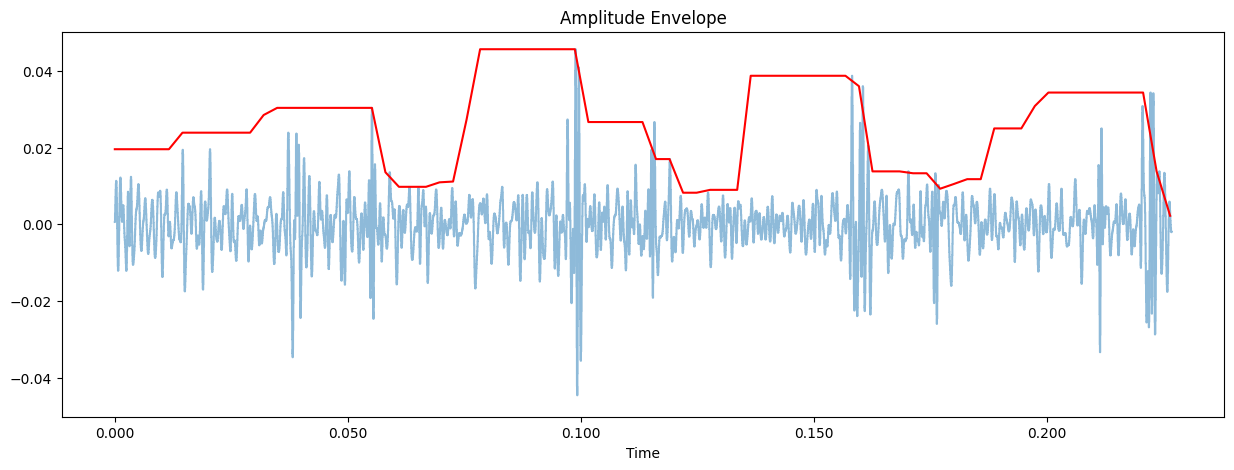

In [13]:
# Normal Signal:
amplitude_envelope(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

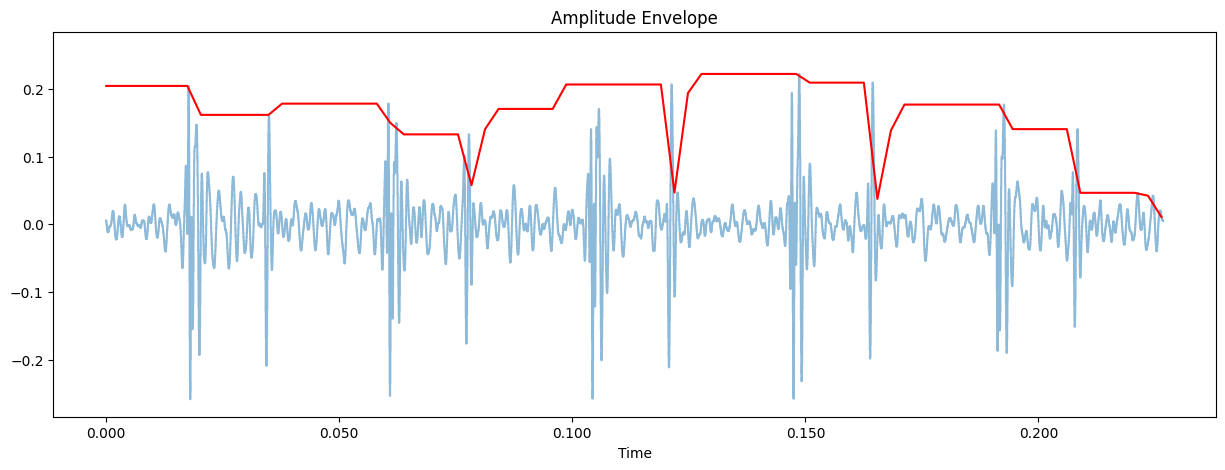

In [14]:
# Abnormal Signal:
amplitude_envelope(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

In [16]:
# Possible extra features to be extracted from amplitude envelope:
AE_NORMAL = amplitude_envelope(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False)
AE_ABNORMAL = amplitude_envelope(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False)
AE_DATA = {'Normal_Signal': [np.mean(AE_NORMAL), np.max(AE_NORMAL), np.min(AE_NORMAL)],
        'Abnormal_Signal': [np.mean(AE_ABNORMAL), np.max(AE_ABNORMAL), np.min(AE_ABNORMAL)]}
AE_EXTRA_FEATURES = pd.DataFrame(AE_DATA, index=['Mean', 'Max', 'Min'])
AE_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,0.025743,0.164404
Max,0.045646,0.222166
Min,0.002198,0.010503


### 1.2. Root Mean Square Energy:
- The Root Mean Square Energy works by detecting the mean value within a frame, which is defined at the first step. 
- It acts as an indicator of loudness, since higher the energy, louder the sound. 
- It is however less sensitive to outliers as compared to the Amplitude Envelope.
- It  returns a list of values.

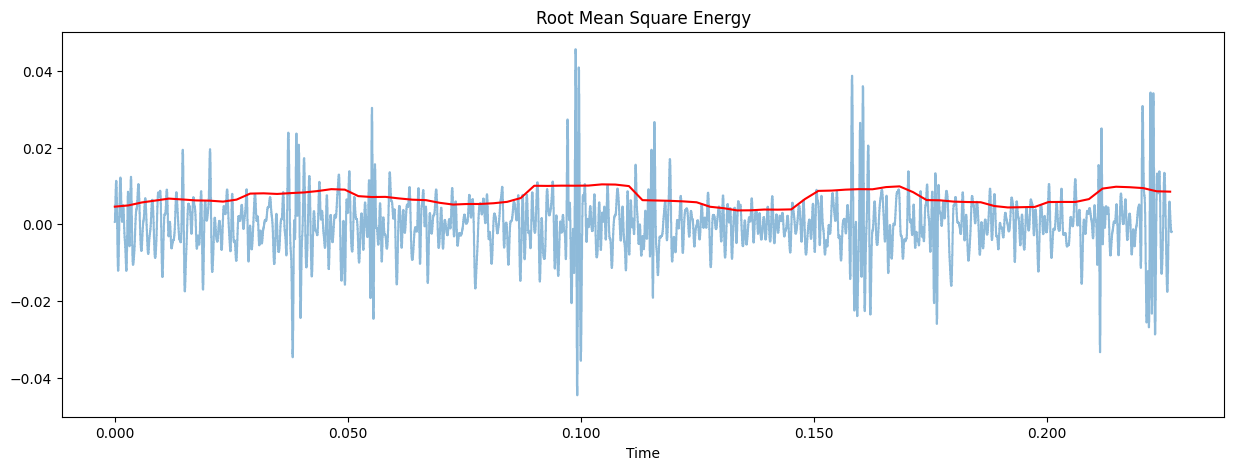

In [17]:
# Normal Signal:
root_mean_square(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

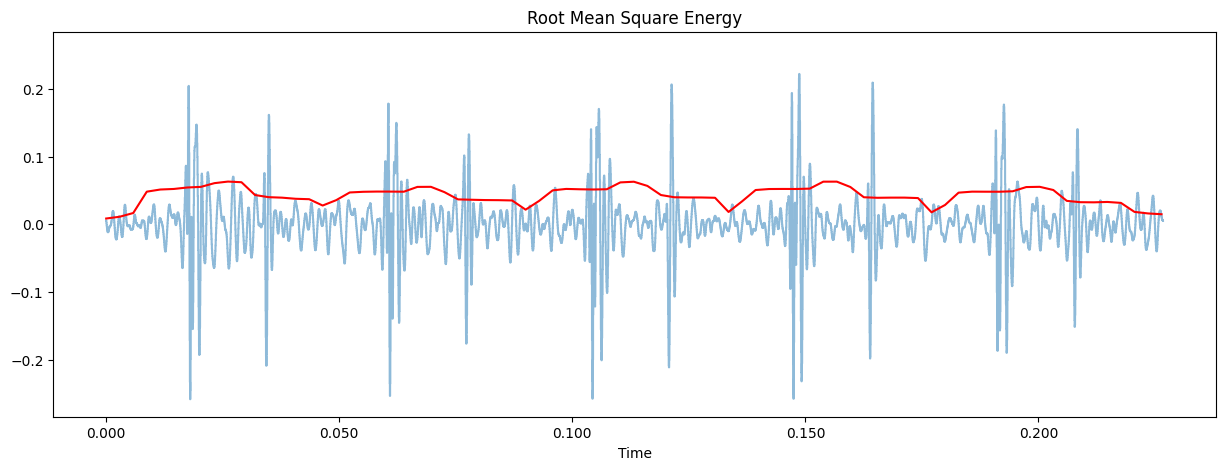

In [18]:
# Abnormal Signal:
root_mean_square(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

In [19]:
# Possible extra features to be extracted from Root Mean Square Energy:
RM_NORMAL = root_mean_square(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                             plot=False)
RM_ABNORMAL = root_mean_square(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                               plot=False)
RM_DATA = {'Normal_Signal': [np.mean(RM_NORMAL), np.max(RM_NORMAL), np.min(RM_NORMAL)],
        'Abnormal_Signal': [np.mean(RM_ABNORMAL), np.max(RM_ABNORMAL), np.min(RM_ABNORMAL)]}
RM_EXTRA_FEATURES = pd.DataFrame(RM_DATA, index=['Mean', 'Max', 'Min'])
RM_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,0.006984,0.042576
Max,0.010395,0.063051
Min,0.003600,0.008432


### 1.3. Zero-Crossing Rate:
- It is the number of times a waveform crosses the horizontal time axis.
- It returns a list of values.

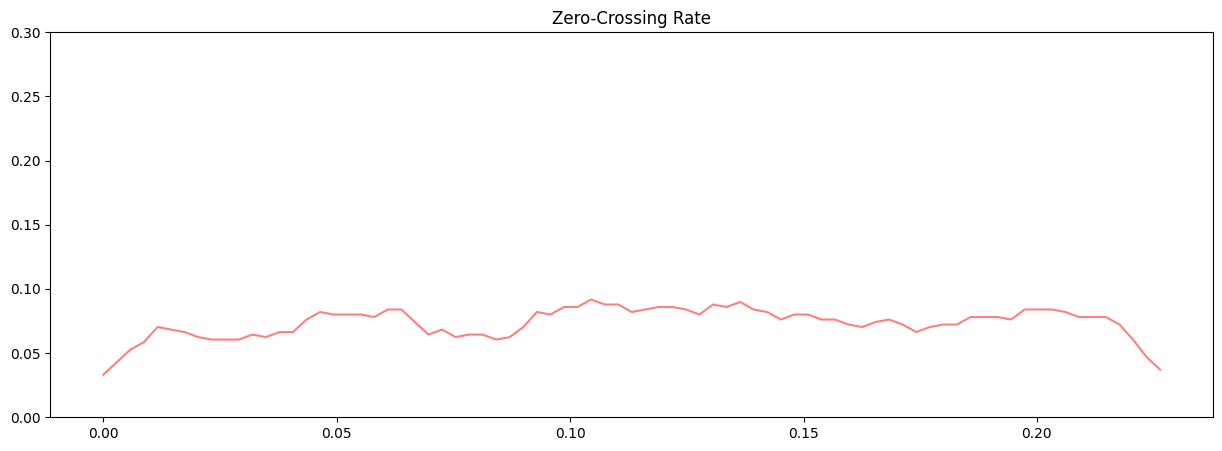

In [20]:
# Normal Signal:
zero_crossing_rate(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

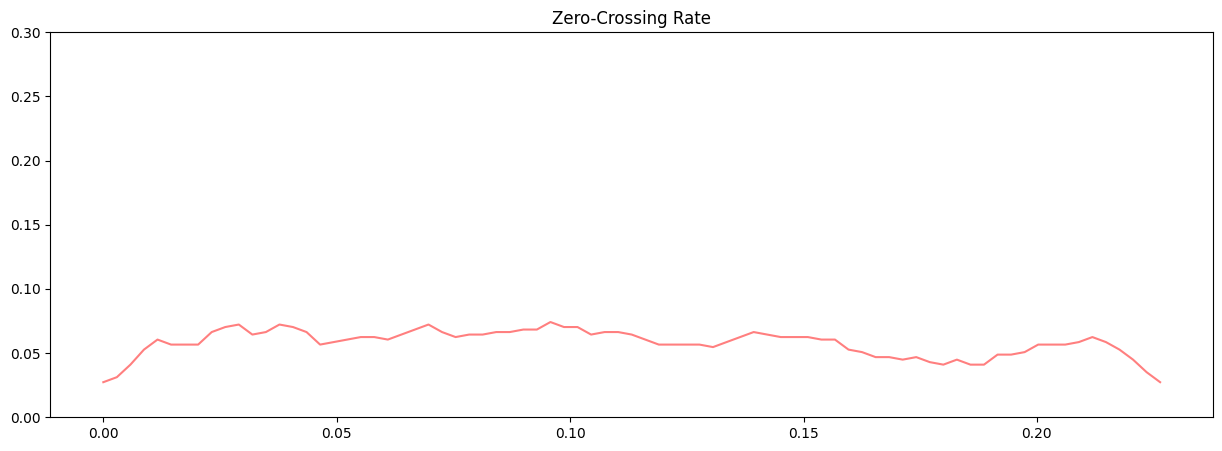

In [58]:
# Abnormal Signal:
zero_crossing_rate(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True)

In [22]:
# Possible extra features to be extracted from Zero Crossing Rate:
ZCR_NORMAL = zero_crossing_rate(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                                plot=False)
ZCR_ABNORMAL = zero_crossing_rate(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                                  plot=False)
ZCR_DATA = {'Normal_Signal': [np.mean(ZCR_NORMAL), np.max(ZCR_NORMAL), np.min(ZCR_NORMAL)],
        'Abnormal_Signal': [np.mean(ZCR_ABNORMAL), np.max(ZCR_ABNORMAL), np.min(ZCR_ABNORMAL)]}
ZCR_EXTRA_FEATURES = pd.DataFrame(ZCR_DATA, index=['Mean', 'Max', 'Min'])
ZCR_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,0.073378,0.057753
Max,0.091797,0.074219
Min,0.033203,0.027344


## Frequency-Domain Features:
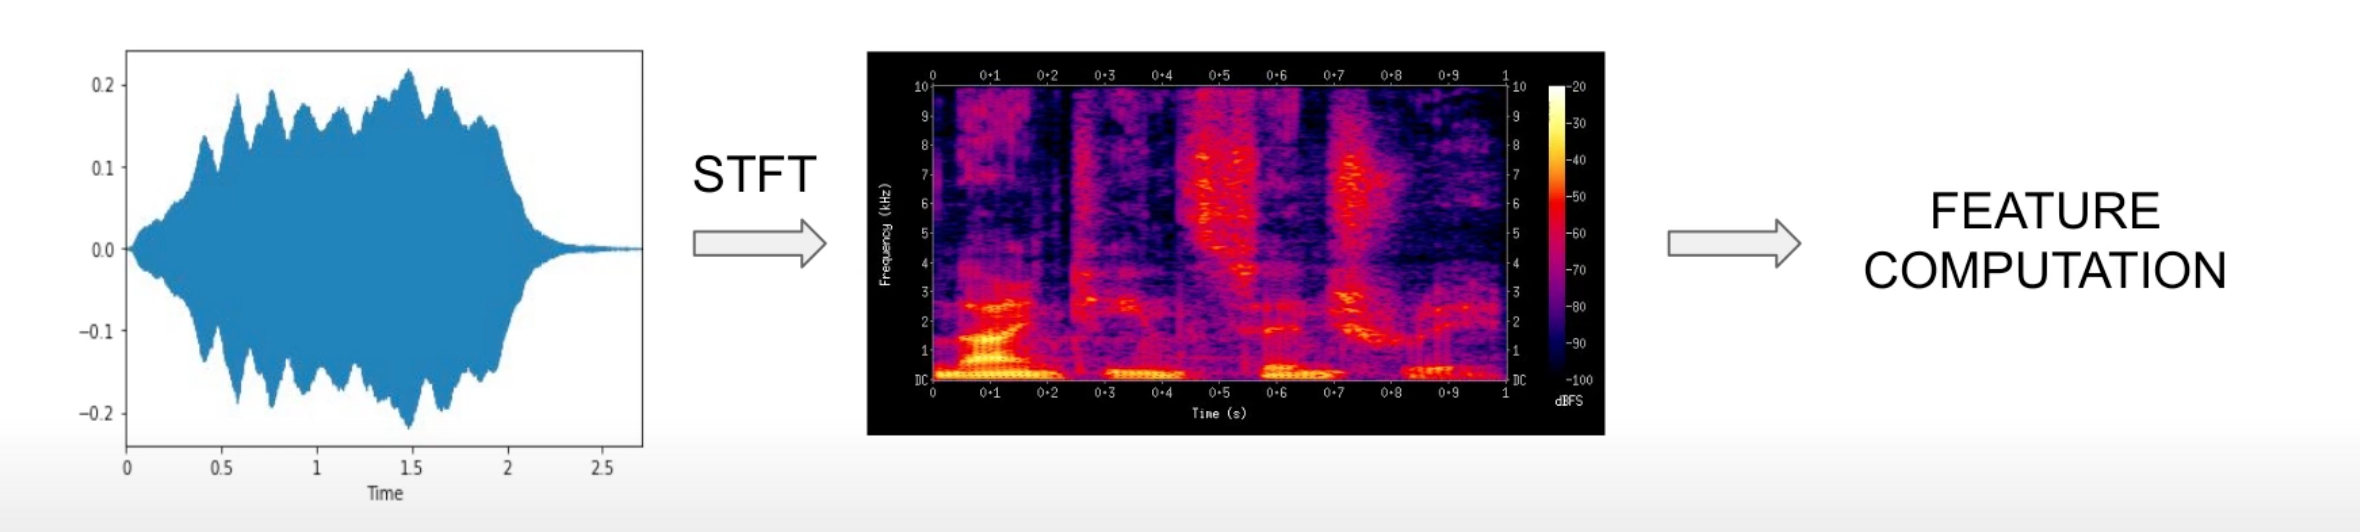

### 2.1. Band Energy Ratio:
- It provides the relation between the lower and higher frequency bands.
- It starts with converting the Signal (Time-Domain) to Spectrogram (Time-Frequency Representation).
- Identifiying the frequency threshold in the Spectrogram of the signal, in which the above and below areas of this threshold are considered as high and low frequency areas. Then, it calculates the ratio within each frame.
- It returns a list of values.

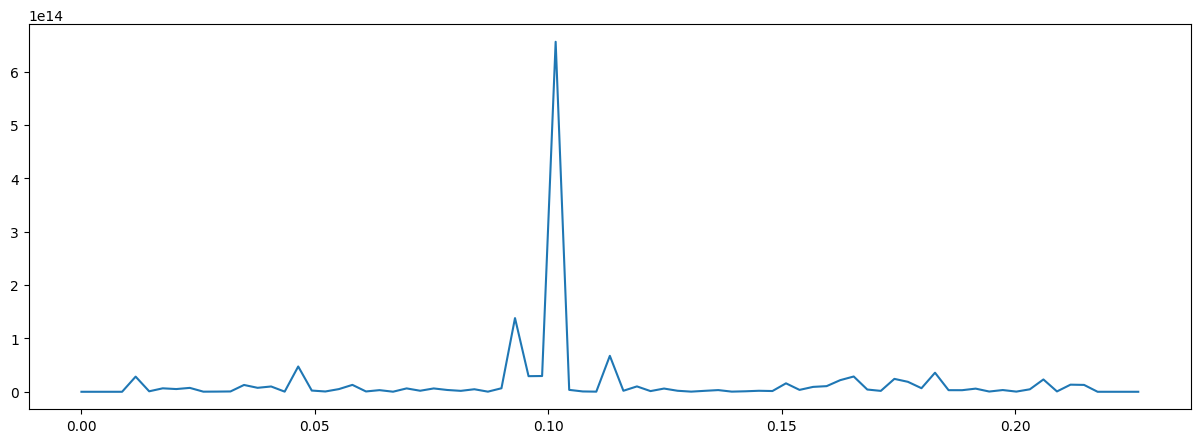

In [51]:
# Normal Signal:
band_energy_ratio(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  split_frequency=256, plot=True)

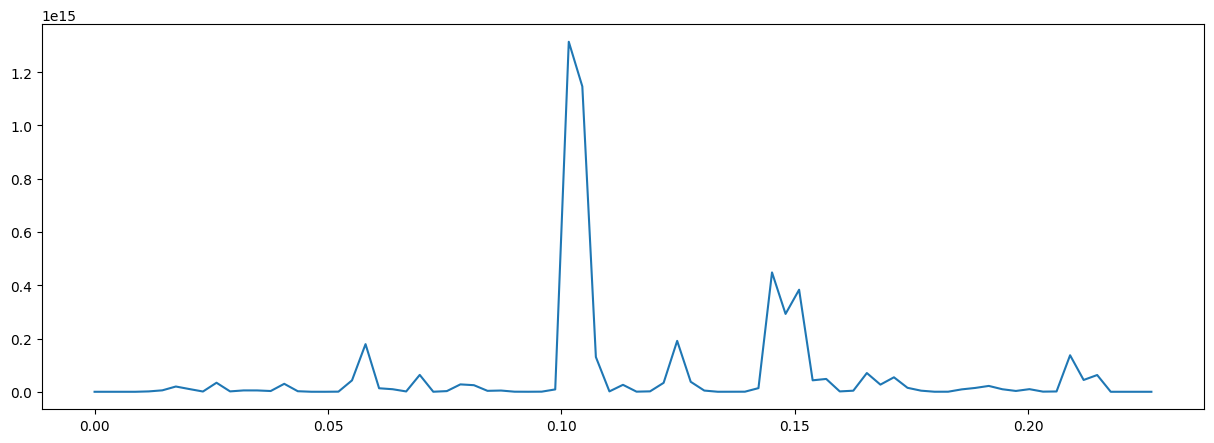

In [52]:
# Abnormal Signal:
band_energy_ratio(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  split_frequency=256, plot=True)

In [23]:
# Possible extra features to be extracted from Band Energy Ratio:
BER_NORMAL = band_energy_ratio(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                               sr=c.SAMPLING_RATE, split_frequency=256, plot=False)
BER_ABNORMAL = band_energy_ratio(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,  
                                 sr=c.SAMPLING_RATE, split_frequency=256, plot=False)
BER_DATA = {'Normal_Signal': [np.mean(BER_NORMAL), np.max(BER_NORMAL), np.min(BER_NORMAL)],
        'Abnormal_Signal': [np.mean(BER_ABNORMAL), np.max(BER_ABNORMAL), np.min(BER_ABNORMAL)]}
BER_EXTRA_FEATURES = pd.DataFrame(BER_DATA, index=['Mean', 'Max', 'Min'])
BER_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,1.759542e+13,6.465038e+13
Max,6.561909e+14,1.313986e+15
Min,3.067123e+04,1.579126e+03


### 2.2. Spectral Centroid:
- It provides the frequency band where most of the energy is concentrated.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

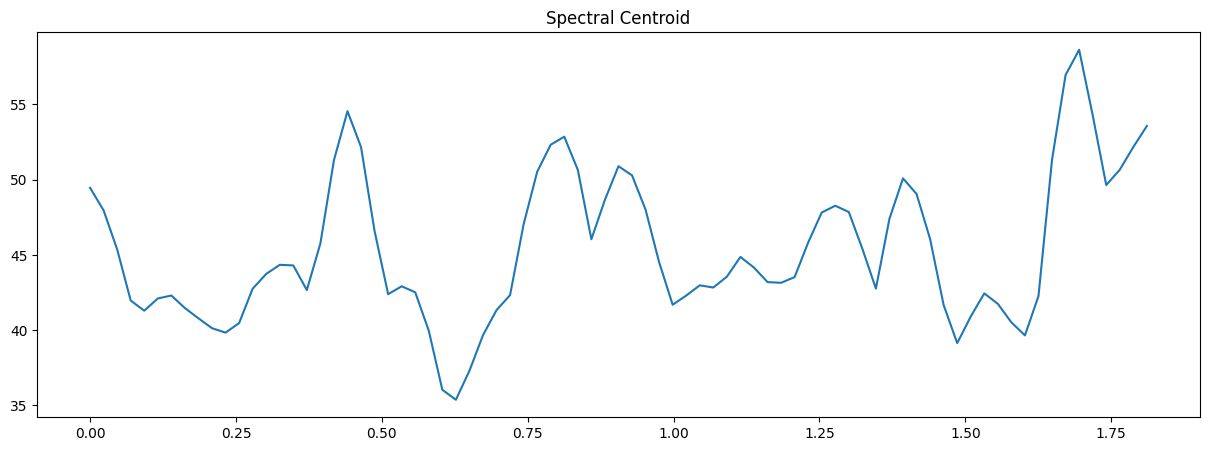

In [27]:
# Normal Signal:
spectral_centroid(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  plot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

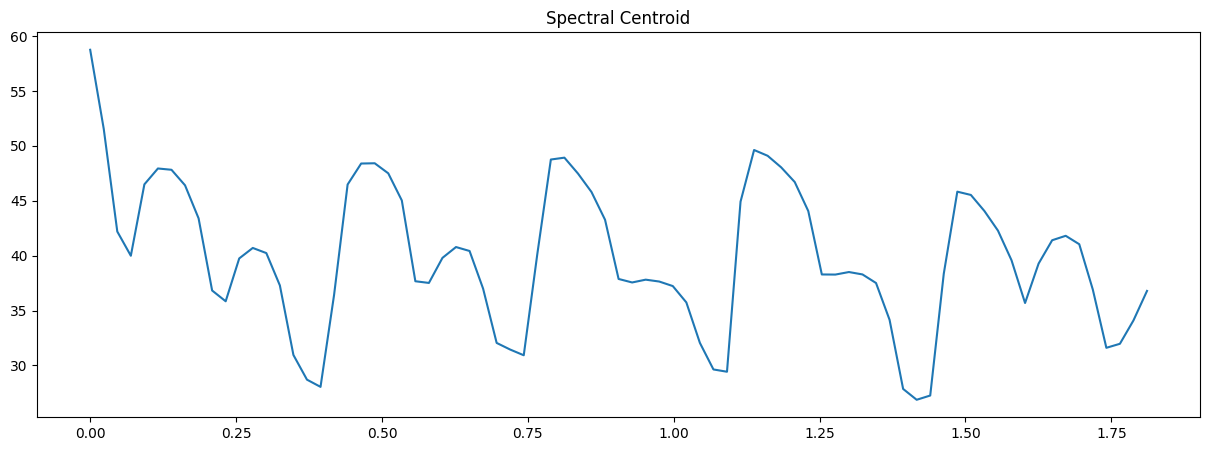

In [28]:
# Abnormal Signal:
spectral_centroid(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  plot=True)

In [29]:
# Possible extra features to be extracted from Spectral Centriod:
SC_NORMAL = spectral_centroid(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                              sr=c.SAMPLING_RATE, plot=False)
SC_ABNORMAL = spectral_centroid(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,  
                                sr=c.SAMPLING_RATE, plot=False)
SC_DATA = {'Normal_Signal': [np.mean(SC_NORMAL), np.max(SC_NORMAL), np.min(SC_NORMAL)],
        'Abnormal_Signal': [np.mean(SC_ABNORMAL), np.max(SC_ABNORMAL), np.min(SC_ABNORMAL)]}
SC_EXTRA_FEATURES = pd.DataFrame(SC_DATA, index=['Mean', 'Max', 'Min'])
SC_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,45.335880,39.844132
Max,58.633182,58.757871
Min,35.378069,26.866480


### 2.3. Spectral Bandwidth:
- It is drived to the spectral centroid.
- It is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

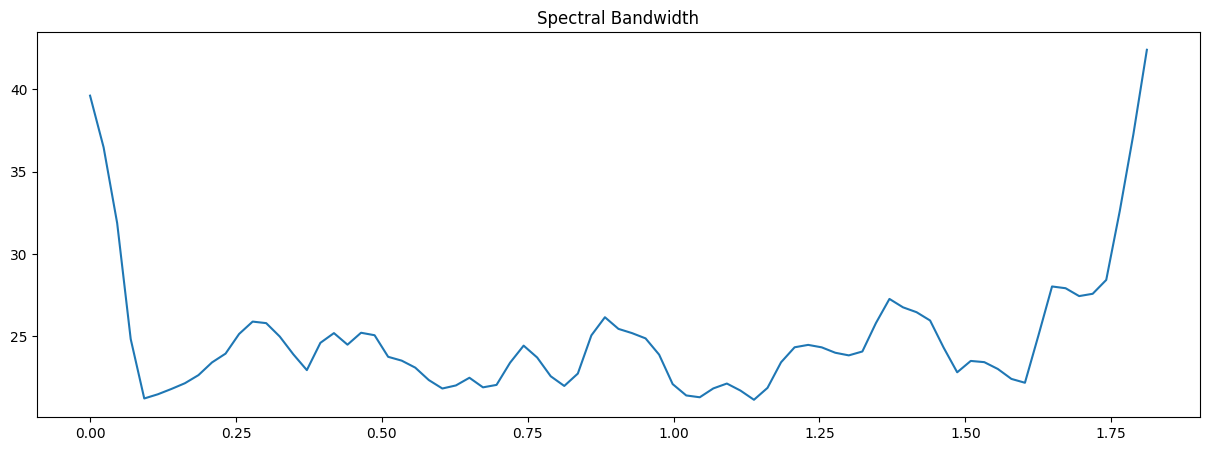

In [31]:
# Normal Signal:
spectral_bandwidth(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   sr=c.SAMPLING_RATE, plot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

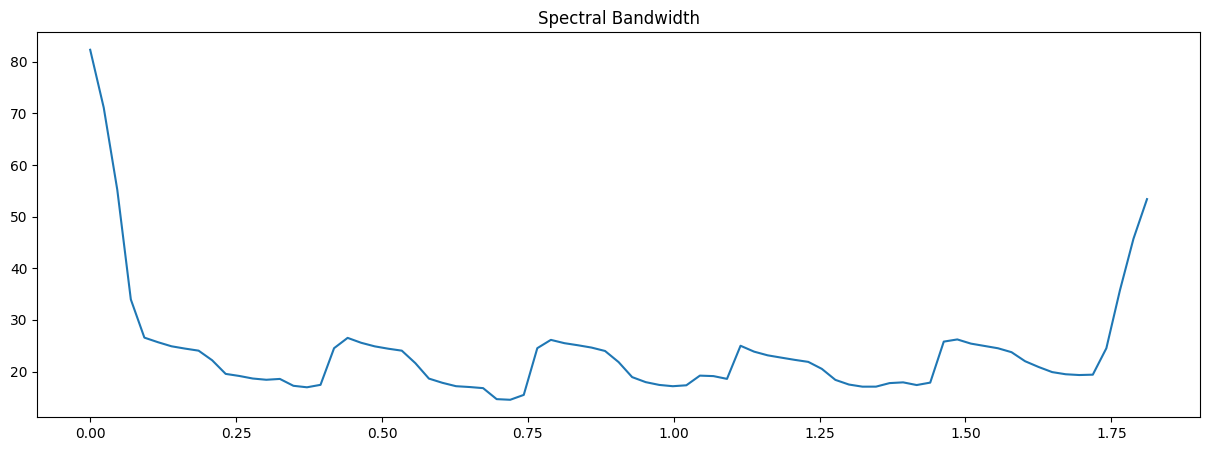

In [32]:
# Abnormal Signal:
spectral_bandwidth(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   sr=c.SAMPLING_RATE, plot=True)

In [34]:
# Possible extra features to be extracted from Spectral Bandwidth:
SB_NORAML = spectral_bandwidth(processed_signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                               sr=c.SAMPLING_RATE, plot=False)
SB_ABNORMAL = spectral_bandwidth(processed_signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                                 sr=c.SAMPLING_RATE, plot=False)
SB_DATA = {'Normal_Signal': [np.mean(SB_NORAML), np.max(SB_NORAML), np.min(SB_NORAML)],
        'Abnormal_Signal': [np.mean(SB_ABNORMAL), np.max(SB_ABNORMAL), np.min(SB_ABNORMAL)]}
SB_EXTRA_FEATURES = pd.DataFrame(SB_DATA, index=['Mean', 'Max', 'Min'])
SB_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,24.901519,23.911289
Max,42.413391,82.306381
Min,21.134067,14.539571


## 3. Time-Frequency representation Features:
### 3.1. Spectrogram:
- It is a Time-Frequency Represenation of a signal.
- The Spectrogram is calculated by apply the Short Time Fourier Transform on a signal by applying the Fourier Transform on each frame of the signal.
- It returns an image.

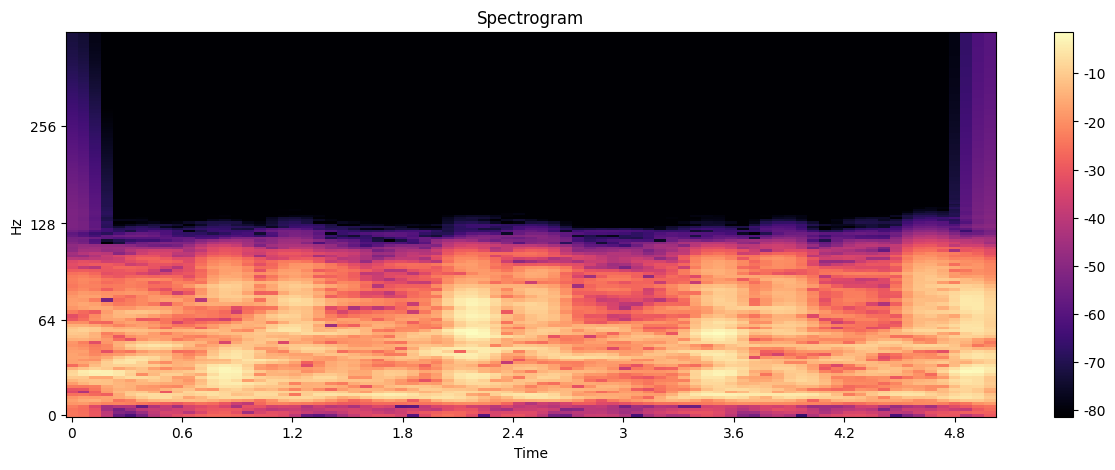

In [35]:
# Normal Signal:
spectrogram(processed_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE)

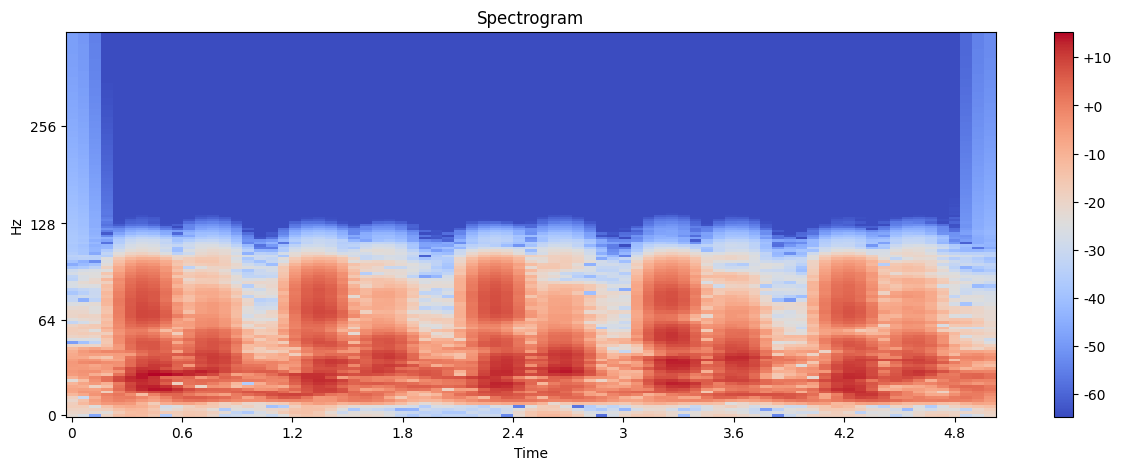

In [36]:
# Abnormal Signal:
spectrogram(processed_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE)

### 3.2. Mel-Spectrogram:

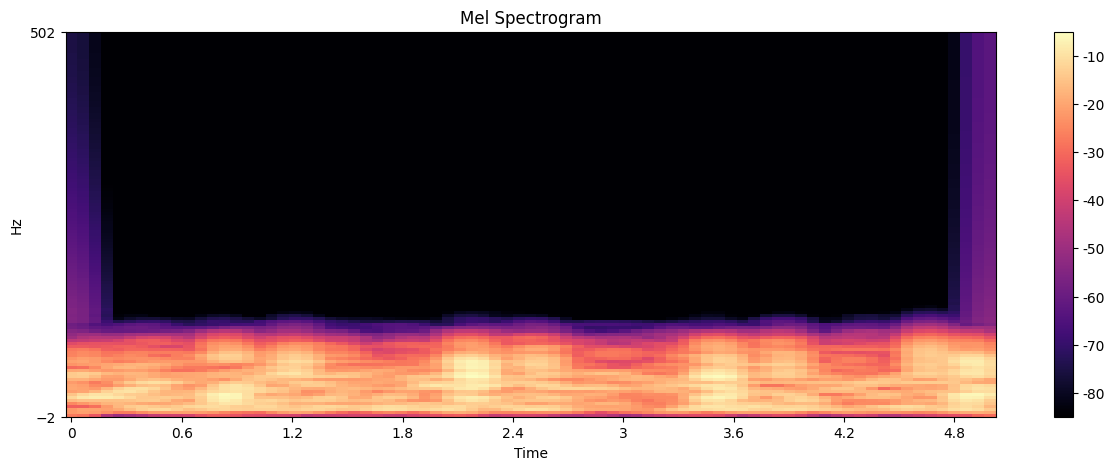

In [37]:
# Normal Signal:
mel_spectrogram(processed_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                n_mels=128)

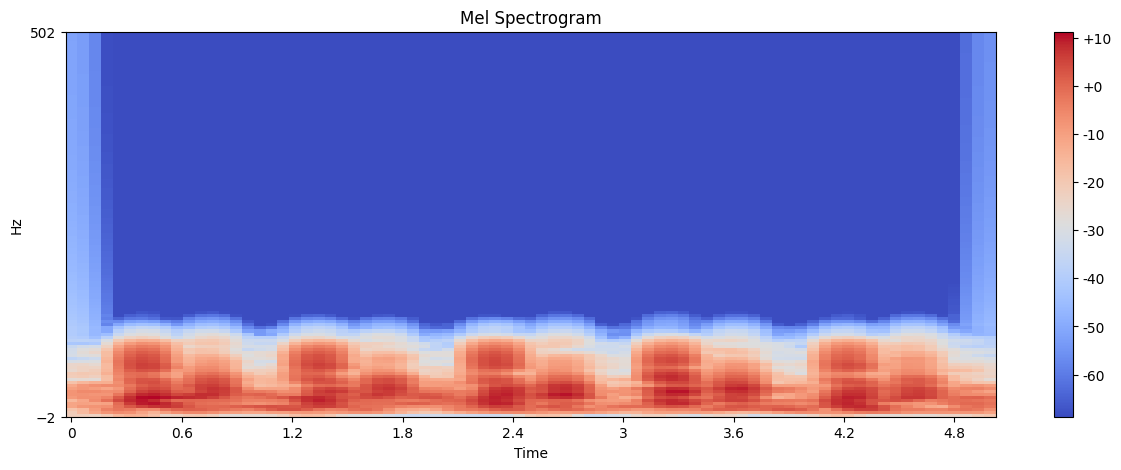

In [38]:
# Abnormal Signal:
mel_spectrogram(processed_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                n_mels=128)

### 3.3. Mel frequency Cepstral Coefficients (MFCCs):
### 3.3.1. MFCCs:

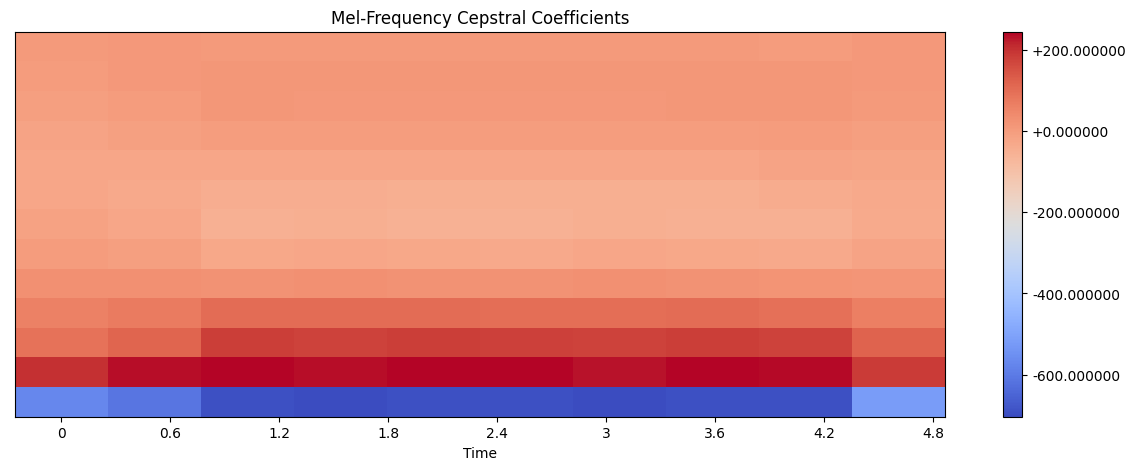

In [44]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='mfccs')

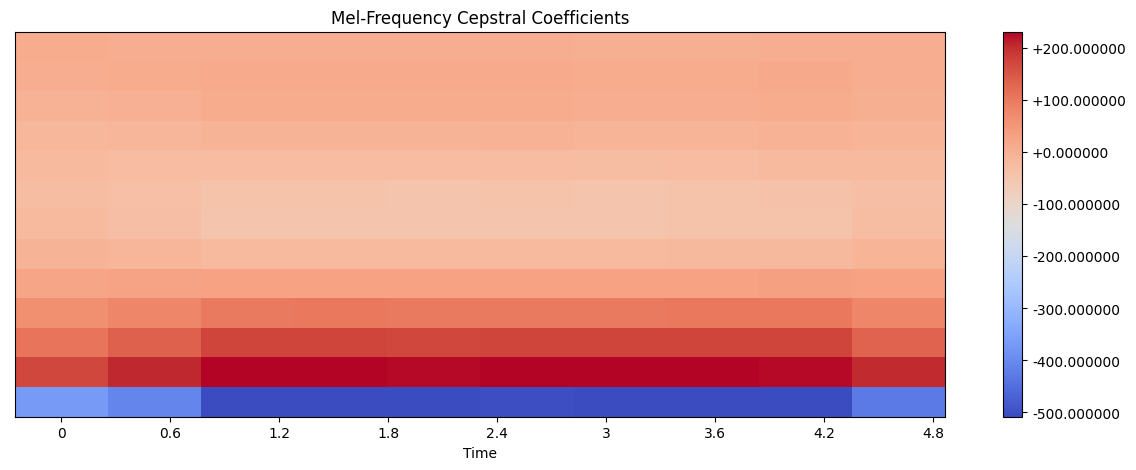

In [43]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='mfccs')

### 3.3.2. Delta_1:

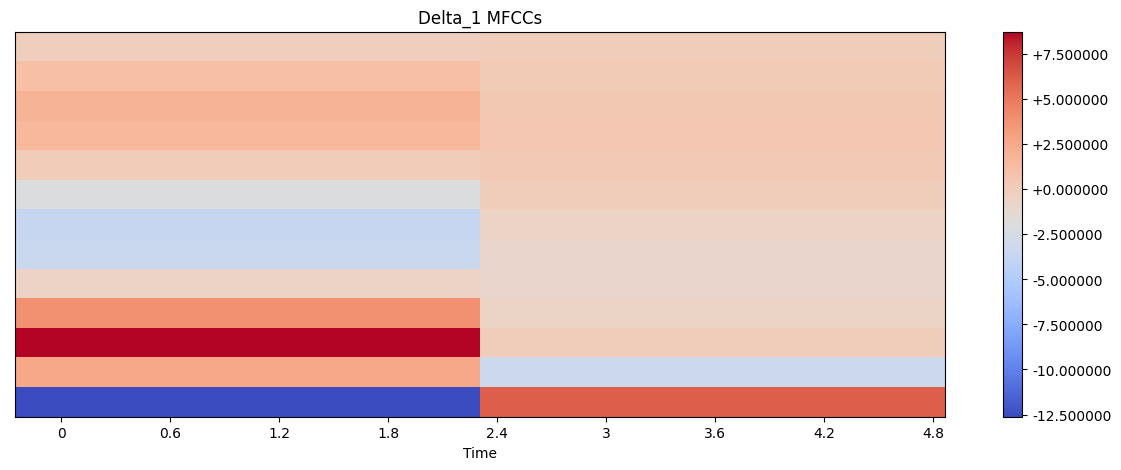

In [42]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='delta_1')

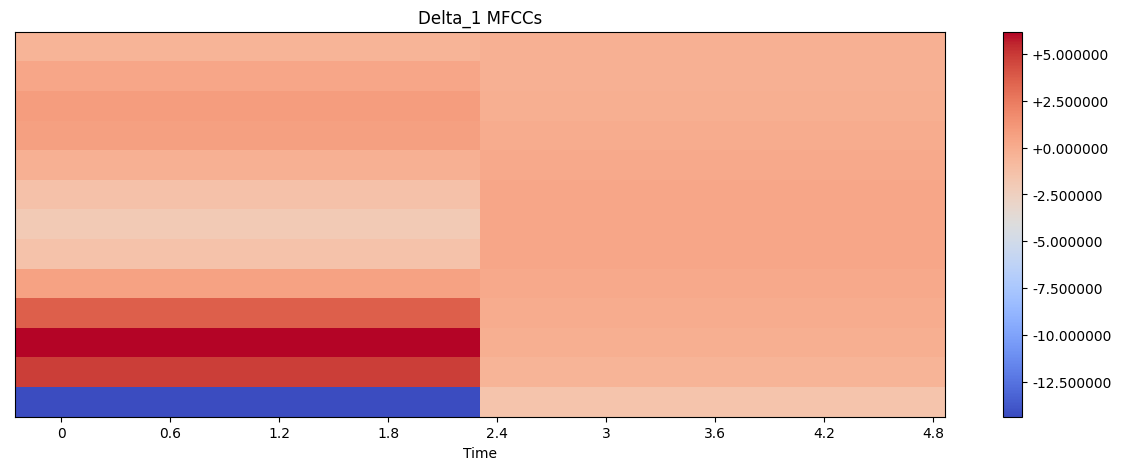

In [41]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='delta_1')

### 3.3.3. Delta_2:

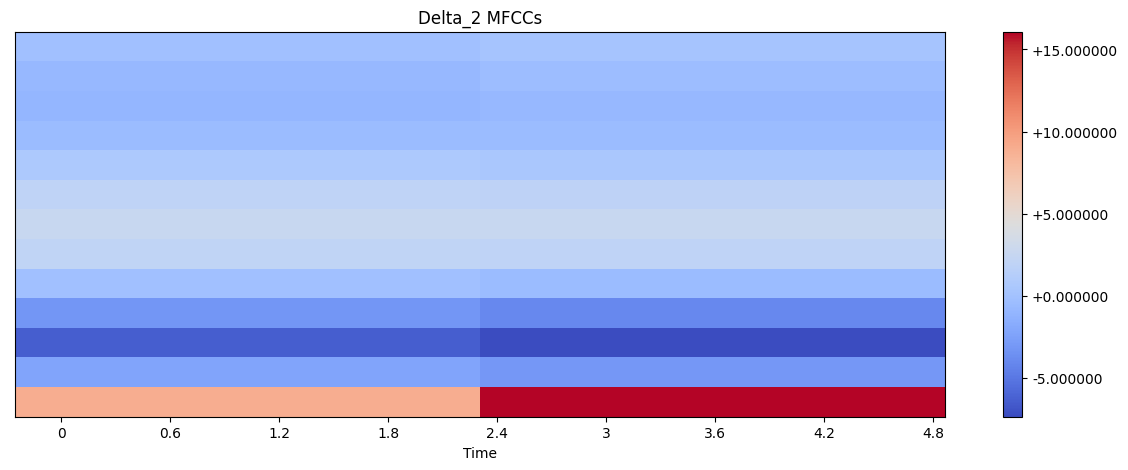

In [40]:
# Normal Signal:
mel_frequency_cepstral_coefficients(processed_signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='delta_2')

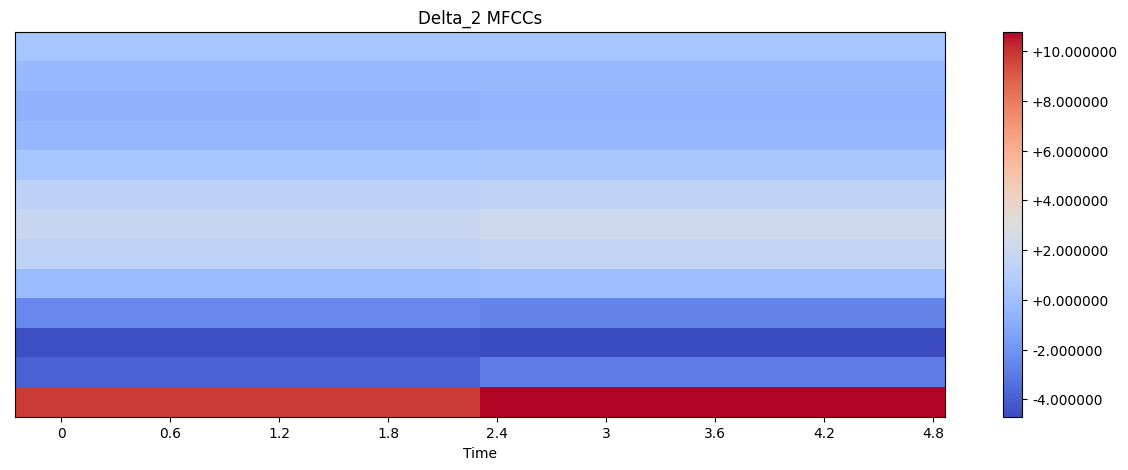

In [39]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(processed_signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=13, plot=True, 
                                    mfcc_type='delta_2')